# Modelamiento Bayesiano - Introducción.

En este notebook vamos a explorar los elementos básicos de un análisis Bayesiano.

Generalmente esto se estudia en combinación con métodos de Montecarlo (MCMC), pero en este caso no lo haremos así. Mi opinión es que eso sólo confunde y es mejor agregarlo al final, estableciendo primero las bases de los métodos Bayesianos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['ggplot', 'demo.mplstyle'])

## El set de datos

Lo que vamos a hacer es estudiar un modelo lineal para un set de datos. Estos datos podrían haber salido de un experimento pero en este caso fueron creados artificialmente con el script `mk-experimento.py`. Los datos a modelar se encuentran en el archivo `experimento.dat`.

In [3]:
datos = np.loadtxt('experimento.dat')

In [4]:
print(datos)

[[-0.025 -3.572  2.   ]
 [ 2.581  4.655  2.   ]
 [ 1.617 -1.173  2.   ]
 [ 2.806  7.916  2.   ]
 [ 1.675  0.813  2.   ]
 [ 0.343  2.551  2.   ]
 [ 2.304  5.716  2.   ]
 [-0.155 -1.664  2.   ]
 [ 0.69  -1.737  2.   ]
 [ 2.649  6.243  2.   ]]


In [5]:
x = datos[:, 0]
y = datos[:, 1]
e_y = datos[:, 2]

En el siguiente gráfico se puden ver los datos que queremos modelar.

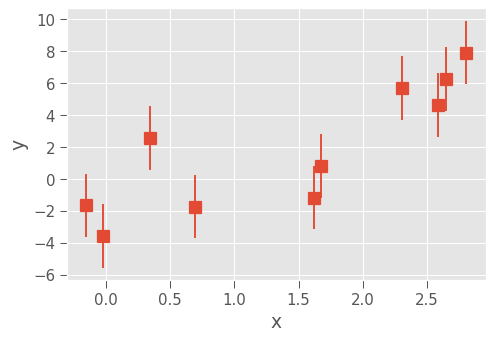

In [6]:
plt.errorbar(x, y, yerr=e_y, ls='None', marker='s')
plt.xlabel('x')
plt.ylabel('y');

Sólo a modo de exporación, dibujemos una línea recta aproximada para los datos.

Hasta acá no hemos hecho ningún análisis, solo estamos explorando, de manera bastante cruda, cómo se ven los datos y los posibles modelos. Es útil hacer este tipo de exploración para familiarizarse con los datos con los que vamos a a trabajar.

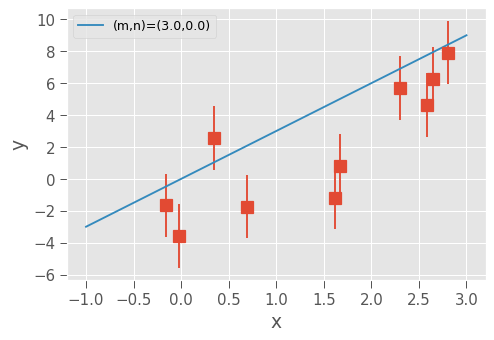

In [7]:
m, n = 3, 0
x_to_plot = np.linspace(-1, 3, 20)
y_to_plot = m * x_to_plot + n

plt.errorbar(x, y, yerr=e_y, ls='None', marker='s')
plt.plot(x_to_plot, y_to_plot, label='(m,n)=({:.1f},{:.1f})'.format(m, n))

plt.legend()
plt.xlabel('x')
plt.ylabel('y');

## Aplicando el teorma de Bayes.

El teorema dice que:

$$ P(\theta|D) \propto P(D|\theta) \times P(\theta) $$

Donde $P(\theta|D)$ es la probabilidad posterior –el objetivo de nuestro análisis es establecer esta probabilidad–; $P(D|\theta)$ es la verosimilitud; y $P(\theta)$ es la probabilidad a priori asociada a un determinado set de parámetros $\theta$ (que en general tiene N dimensiones y que en nuestro caso tendrá 2).

Partamos por el cálculo de la verosimilitud. La pregunta a hacerse es:

*Dado un set de parámetros fijo, cuál es la probabilidad de obtener los datos observados?*

Es común asumir que el modelo admite un ruido gausiano, en cuyo caso la verosimilitud se puede calcular como:

$$ \mathcal{L}((x_i, y_i)|\theta) = \frac{1}{\sqrt{2 \pi \sigma^2}}  \exp \left( \frac{-(y_i - f(x_i))^2}{2 \sigma^2} \right)$$


In [8]:
verosimilitudes = 1 / np.sqrt(2 * np.pi * e_y**2) * np.exp(-(y - (m * x + n))**2 / (2 * e_y**2))
print(verosimilitudes)

[0.043252   0.06056405 0.00213742 0.19328563 0.02171605 0.1493226
 0.16681202 0.16666227 0.03259026 0.13875608]


Y si las observaciones son independientes, entonces la verosimilitud asociada a cada punto, es la multiplicación de todos los arreglo del vector anterior.

In [9]:
verosimilitud = np.prod(verosimilitudes)
print(verosimilitud)

4.411848207244555e-13


Luego exploraremos más en detalle el efecto del prior. Por ahora asignemosle algún valor cualqueira:

In [10]:
prior = 1.

In [11]:
posterior_3_0 = verosimilitud * prior
print(posterior_3_0)

4.411848207244555e-13


## Calcularemos la posterior para un rango de valores (m, n)

Lo que nos interesa es calcular la probabilidad posterior en un rango amplio de valores. De ese modo, luego podemos explorar el espacio de parámetros y preguntarnos, cuáles valores tienen mayor probabilidad (posterior), de representar correctamente los datos.

In [12]:
# Definimos el rango de valores a explorar.
# acá esto está hecho arbitrariamente.

m = np.arange(0, 6., 0.2)
n = np.arange(-7, 3, 0.2)

Las siguientes funciones nos permitirán evaluar el modelo, la verosimilitud y el prior con flexibilidad.

In [13]:
def modelo(parametros, x):
    m, n = parametros
    output = m * x + n
    return output

def verosimilitud(modelo, parametros, x, y, e_y):
    exp = np.exp(-(y - modelo(parametros, x))**2 / (2 * e_y**2))
    verosimilitudes = exp / np.sqrt(2 * np.pi * e_y**2)
    output = np.prod(verosimilitudes)
    return output

def prior(m, n):
    if m < 2.0:
        return 0
    return 1.0

Finalmente podemos evaluar la posterior en todos los puntos de nuestra grilla.

In [14]:
posterior = np.zeros((len(m), len(n)))

for i, m_i in enumerate(m):
    for j, n_j in enumerate(n):
        pars = (m_i, n_j)
        posterior[i, j] = verosimilitud(modelo, pars, x, y, e_y) * prior(m_i, n_j)

In [15]:
print(posterior)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00811691e-14 1.70665301e-14 2.61426804e-14 ... 6.34002423e-51
  9.76205348e-53 1.36007231e-54]
 [4.50053495e-15 6.59160103e-15 8.73550947e-15 ... 3.12744036e-54
  4.16611972e-56 5.02163343e-58]
 [1.44589430e-15 1.83212780e-15 2.10061051e-15 ... 1.11021304e-57
  1.27950350e-59 1.33428064e-61]]


Y podemos visualizar la probabilidad posterior.

Notar la truncación de la posterior que está impuesta en el prior definido arriba.

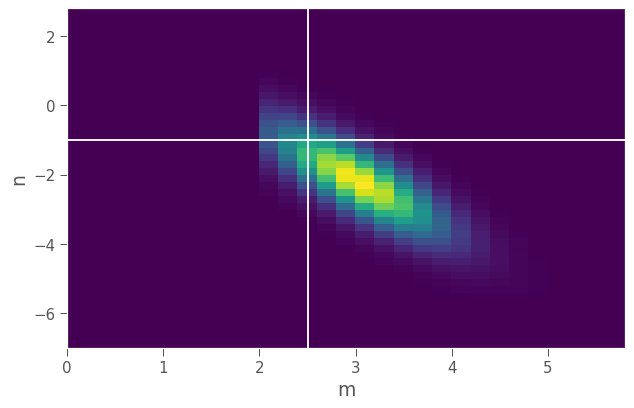

In [16]:
m_grid, n_grid = np.meshgrid(m, n, indexing='ij')

plt.figure(1, figsize=(8, 5))
plt.pcolormesh(m_grid, n_grid, posterior)

plt.axvline(2.5, color='white')
plt.axhline(-1, color='white')

plt.xlabel('m')
plt.ylabel('n');

En el gráfico de arriba, noten que `m` y `n` están graficados con escalas distintas, esto hace un poco confusa su interpretación. Más adelante utilizaremos `ax.set_aspect('equal')` para mejorar este aspecto.

A veces es útil explorar las probabilidades marginales. Por definición, estas se obtienen integrando para todos los otros parámetros. En nuestro caso, implementaremos una integral muy sencilla:

In [17]:
marginal_n = np.sum(posterior, axis=0) * 0.2
marginal_m = np.sum(posterior, axis=1) * 0.2

Y podemos visualizar las marginales.

Las líneas verticales corresponden a los parámetros con los cuales fueron generados los datos sintéticos en el script `mk-experimento.py`.

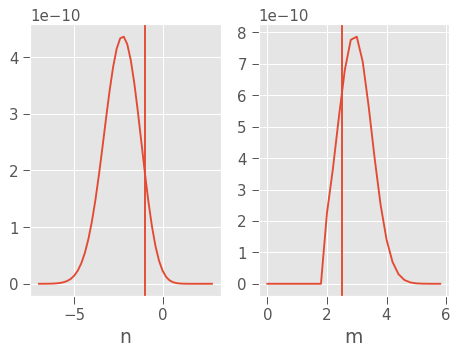

In [18]:
plt.subplot(121)
plt.plot(n, marginal_n)
plt.axvline(-1)
plt.xlabel('n')

plt.subplot(122)
plt.plot(m, marginal_m)
plt.axvline(2.5)
plt.xlabel('m');

---

# Impacto del Prior

A continuación exploraremos el efecto que tienen dos priors distintos en la probabilidad posterior. La idea es entender cómo afectan el resultado final (es decir, la probabilidad posterior).

Las siguientes celdas son muy parecidas a las del notebook `prior-gausiano.ipynb`. Lo más importante de las siguientes celdas, es que definimos 2 priors distintos. Los priors tienen el mismo vector de esperanzas y matrices de covarianza diagonales pero una matriz de covarianza tiene varianzas mucho más grande que la otra.

In [19]:
from scipy.stats import multivariate_normal

In [20]:
mu = [4, 1]

s = 10**2
sigma_10 = [[s, 0],
            [0, s]]

s = 0.5**2
sigma_05 = [[s, 0],
            [0, s]]

gaus_2d_rv_10 = multivariate_normal(mu, sigma_10)
gaus_2d_rv_05 = multivariate_normal(mu, sigma_05)

In [21]:
posiciones = np.empty(m_grid.shape + (2,))
posiciones[:,:,0] = m_grid
posiciones[:,:,1] = n_grid

In [22]:
prior_10 = gaus_2d_rv_10.pdf(posiciones)
prior_05 = gaus_2d_rv_05.pdf(posiciones)

A continuación podemos ver cómo se comparan los dos priors. Lo más importante es que en uno la probablidad está _"desparramada"_ en una región mucho más amplia del espacio de parámetros.

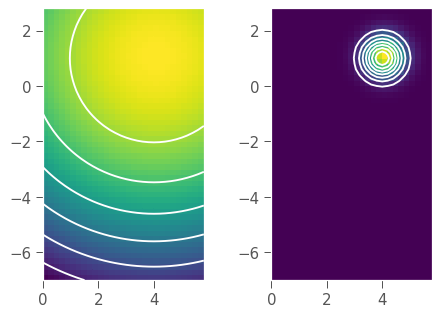

In [23]:
fig = plt.figure(1)

ax1 = fig.add_subplot(121)
ax1.set_aspect('equal')
ax1.pcolormesh(m_grid, n_grid, prior_10)
ax1.contour(m_grid, n_grid, prior_10, colors='white')

ax2 = fig.add_subplot(122)
ax2.set_aspect('equal')
ax2.pcolormesh(m_grid, n_grid, prior_05)
ax2.contour(m_grid, n_grid, prior_05, colors='white');

Ahora evaluemos la verosimilitud, reutilizando las funciones que ya habíamos escrito.

In [24]:
likelihood = np.zeros((len(m), len(n)))

for i, m_i in enumerate(m):
    for j, n_j in enumerate(n):
        pars = (m_i, n_j)
        likelihood[i, j] = verosimilitud(modelo, pars, x, y, e_y)

Finalmente las posteriores se pueden calcular multiplicando la verosimilitud por los dos priors distintos que estamos comparando.

In [25]:
posterior_10 = likelihood * prior_10
posterior_05 = likelihood * prior_05

El siguiente gráfico nos muestra cómo se comporta la posterior en el caso de un prior poco informativo. Básicamente, la posterior está dominada por la verosimilitud en este caso.

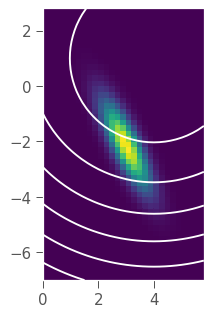

In [26]:
fig = plt.figure(1)

ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')
ax1.pcolormesh(m_grid, n_grid, posterior_10)
ax1.contour(m_grid, n_grid, prior_10, colors='white');

Ahora veremos la posterior calculada con el prior más informativo.

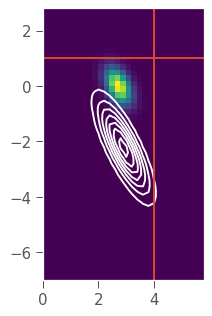

In [27]:
fig = plt.figure(1)

ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')
ax1.pcolormesh(m_grid, n_grid, posterior_05)
ax1.contour(m_grid, n_grid, posterior_10, colors='white')

plt.axvline(mu[0])
plt.axhline(mu[1]);

Las líneas de contorno muestran la posterior calculada con el prior menos informativo, y las líneas verticales muestran los parámetros con los cuales se generaron los datos sintéticos.

Como podemos ver, en este caso la posterior es un caso intermedio. Lo que ocurre es que si bien el prior es muy informativo, la verosimilitud también lleva consigo mucha información, por lo que el resultado final es un balance entre ambas.